In [1]:
!pip install -q transformers
!pip install -q datasets
!pip install -q umap-learn

     |████████████████████████████████| 2.6 MB 9.2 MB/s 
     |████████████████████████████████| 3.3 MB 48.9 MB/s 
     |████████████████████████████████| 636 kB 58.4 MB/s 
     |████████████████████████████████| 895 kB 32.6 MB/s 
     |████████████████████████████████| 264 kB 7.6 MB/s 
     |████████████████████████████████| 243 kB 60.0 MB/s 
     |████████████████████████████████| 118 kB 62.0 MB/s 
     |████████████████████████████████| 80 kB 5.7 MB/s 
     |████████████████████████████████| 1.1 MB 36.0 MB/s 


In [2]:
from datasets import list_datasets

In [3]:
datasets = list_datasets()
print(f"There are {len(datasets)} datasets currently available on the Hub.")
print(f"The first 10 are: {datasets[:10]}")

There are 1195 datasets currently available on the Hub.
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [4]:
metadata = list_datasets(with_details=True)[datasets.index("emotion")]
# Show dataset description
print("Description:", metadata.description, "\n")
# Show first 8 lines of the citation string
print("Citation:", "\n".join(metadata.citation.split("\n")[:8]))

Description: Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper. 

Citation: @inproceedings{saravia-etal-2018-carer,
    title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",
    author = "Saravia, Elvis  and
      Liu, Hsien-Chi Toby  and
      Huang, Yen-Hao  and
      Wu, Junlin  and
      Chen, Yi-Shin",
    booktitle = "Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing",


In [5]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


In [6]:
# load_dataset("csv", data_files="my_texts.csv")

In [7]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train_ds = emotions["train"]

In [9]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [10]:
len(train_ds)

16000

In [11]:
train_ds[0]

{'label': 0, 'text': 'i didnt feel humiliated'}

In [12]:
train_ds.column_names

['text', 'label']

In [13]:
train_ds.features

{'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None),
 'text': Value(dtype='string', id=None)}

In [14]:
train_ds[:5]

{'label': [0, 0, 3, 2, 3],
 'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy']}

In [15]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [16]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [17]:
def label_int2str(row, split):
    return emotions[split].features["label"].int2str(row)

In [18]:
df["label_name"] = df["label"].apply(label_int2str, split="train")

In [19]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


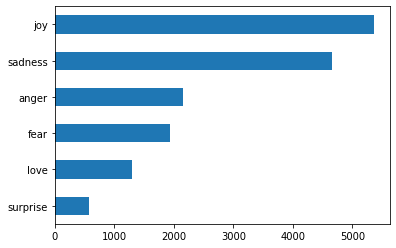

In [21]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()

In [22]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)

In [23]:
df.head()

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


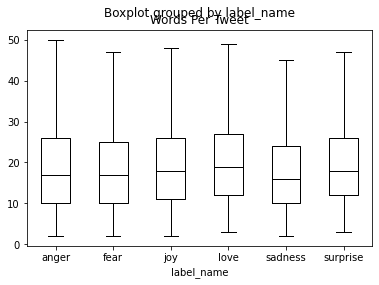

In [24]:
df.boxplot("Words Per Tweet", by='label_name', grid=False, showfliers=False,
           color='black', )

In [26]:
from transformers import AutoTokenizer

model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [27]:
tokenizer.vocab_size

30522

In [28]:
tokenizer.special_tokens_map

{'cls_token': '[CLS]',
 'mask_token': '[MASK]',
 'pad_token': '[PAD]',
 'sep_token': '[SEP]',
 'unk_token': '[UNK]'}

In [29]:
tokenizer.model_max_length

512

In [35]:
encoded_str = tokenizer.encode("this is a complicatedtest")
encoded_str

[101, 2023, 2003, 1037, 8552, 22199, 102]

In [36]:
for token in encoded_str:
    print(token, tokenizer.decode([token]))

101 [CLS]
2023 this
2003 is
1037 a
8552 complicated
22199 ##test
102 [SEP]


In [37]:
import torch
from transformers import AutoModel



In [38]:
torch.cuda.is_available()

True

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [40]:
device

device(type='cuda')

In [41]:
model = AutoModel.from_pretrained(model_name).to(device)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [42]:
text = "this is a test"
text_tensor = tokenizer.encode(text, return_tensors="pt").to(device)

In [43]:
text_tensor.shape

torch.Size([1, 6])

In [44]:
output = model(text_tensor)

In [45]:
output.last_hidden_state.shape

torch.Size([1, 6, 768])

In [46]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [47]:
emotions.reset_format()

In [48]:
tokenize(emotions["train"][:3])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}

In [49]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [50]:
emotions_encoded["train"].features

{'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None),
 'text': Value(dtype='string', id=None)}

In [51]:
import numpy as np

def forward_pass(batch):
    input_ids = torch.tensor(batch["input_ids"]).to(device)
    attention_mask = torch.tensor(batch["attention_mask"]).to(device)

    with torch.no_grad():
        last_hidden_state = model(input_ids, attention_mask).last_hidden_state
        last_hidden_state = last_hidden_state.cpu().numpy()

    # Use average of unmasked hidden states for classification
    lhs_shape = last_hidden_state.shape
    boolean_mask = ~np.array(batch["attention_mask"]).astype(bool)
    boolean_mask = np.repeat(boolean_mask, lhs_shape[-1], axis=-1)
    boolean_mask = boolean_mask.reshape(lhs_shape)
    masked_mean = np.ma.array(last_hidden_state, mask=boolean_mask).mean(axis=1)
    batch["hidden_state"] = masked_mean.data
    return batch

In [52]:
emotions_encoded = emotions_encoded.map(forward_pass, batched=True, batch_size=16)

  0%|          | 0/1000 [00:00<?, ?ba/s]

  0%|          | 0/125 [00:00<?, ?ba/s]

  0%|          | 0/125 [00:00<?, ?ba/s]

In [53]:
emotions_encoded["train"].features

{'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'hidden_state': Sequence(feature=Value(dtype='float64', id=None), length=-1, id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None),
 'text': Value(dtype='string', id=None)}

In [54]:
X_train = np.array(emotions_encoded["train"]["hidden_state"])
X_valid = np.array(emotions_encoded["validation"]["hidden_state"])
y_train = np.array(emotions_encoded["train"]["label"])
y_valid = np.array(emotions_encoded["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [55]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns=['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,X,Y,label
0,6.337115,4.245768,0
1,1.408929,4.327597,0
2,5.482506,1.326395,3
3,2.408079,2.685909,2
4,0.931873,6.800463,3


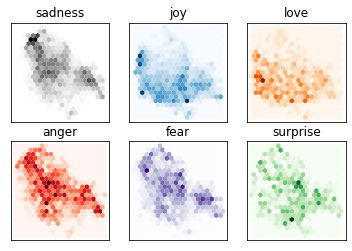

In [56]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = ['sadness', 'joy', 'love', 'anger','fear', 'surprise']

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

In [57]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(n_jobs=-1, penalty="none")
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6405

In [58]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

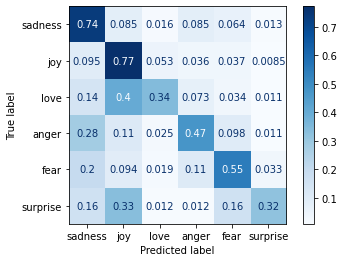

In [59]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr_clf, X_valid, y_valid, display_labels=labels, normalize='true', cmap=plt.cm.Blues);

In [60]:
from sklearn.metrics import classification_report
y_preds = lr_clf.predict(X_valid)
print(classification_report(y_valid, y_preds, target_names=labels))

              precision    recall  f1-score   support

     sadness       0.64      0.74      0.69       550
         joy       0.73      0.77      0.75       704
        love       0.51      0.34      0.41       178
       anger       0.54      0.47      0.51       275
        fear       0.52      0.55      0.53       212
    surprise       0.51      0.32      0.39        81

    accuracy                           0.64      2000
   macro avg       0.58      0.53      0.55      2000
weighted avg       0.63      0.64      0.63      2000



In [61]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (
    AutoModelForSequenceClassification
    .from_pretrained(model_name, num_labels=num_labels)
    .to(device)
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.bias', 'pre_classi

In [62]:
emotions_encoded.set_format(
    "torch",
    columns=["input_ids", "attention_mask", "label"]
)

In [63]:
emotions_encoded["train"][0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [66]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [64]:
from transformers import TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
training_args = TrainingArguments(
    output_dir="results",
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    metric_for_best_model="f1",
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
)

In [67]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"])

trainer.train();

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: hidden_state, text.
***** Running training *****
  Num examples = 16000
  Num Epochs = 2
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 500


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.816800,0.319623,0.902000,0.897405
2,0.243400,0.215900,0.925000,0.925321


The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: hidden_state, text.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64
Saving model checkpoint to results/checkpoint-500
Configuration saved in results/checkpoint-500/config.json
Model weights saved in results/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: hidden_state, text.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64


Training completed. Do not forget to share your model on huggingface.co/models =)




In [68]:
results = trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: hidden_state, text.
***** Running Evaluation *****
  Num examples = 2000
  Batch size = 64


In [69]:
results

{'epoch': 2.0,
 'eval_accuracy': 0.925,
 'eval_f1': 0.9253214355288947,
 'eval_loss': 0.2159004807472229,
 'eval_runtime': 4.3712,
 'eval_samples_per_second': 457.545,
 'eval_steps_per_second': 7.321}

In [70]:
preds_output = trainer.predict(emotions_encoded["validation"])

The following columns in the test set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: hidden_state, text.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 64


In [71]:
preds_output.metrics

{'test_accuracy': 0.925,
 'test_f1': 0.9253214355288947,
 'test_loss': 0.2159004807472229,
 'test_runtime': 4.3355,
 'test_samples_per_second': 461.304,
 'test_steps_per_second': 7.381}

In [72]:
y_preds = np.argmax(preds_output.predictions, axis=1)

In [73]:
y_preds

array([0, 0, 2, ..., 1, 2, 1])

In [74]:
class TransformerClf():
    def __init__(self, trainer):
        self._trainer = trainer
        self._estimator_type = "classifier"
    
    def predict(self, X):
        preds = self._trainer.predict(X)
        return np.argmax(preds.predictions, axis=1)

In [75]:
transformer_clf = TransformerClf(trainer)

The following columns in the test set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: hidden_state, text.
***** Running Prediction *****
  Num examples = 2000
  Batch size = 64


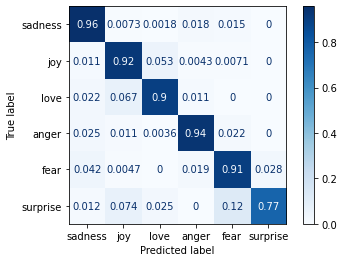

In [76]:
plot_confusion_matrix(transformer_clf, emotions_encoded["validation"], y_valid, display_labels=labels, normalize='true', cmap=plt.cm.Blues);

In [77]:
print(classification_report(y_valid, y_preds, target_names=labels))

              precision    recall  f1-score   support

     sadness       0.95      0.96      0.95       550
         joy       0.96      0.92      0.94       704
        love       0.80      0.90      0.84       178
       anger       0.93      0.94      0.93       275
        fear       0.87      0.91      0.89       212
    surprise       0.91      0.77      0.83        81

    accuracy                           0.93      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.93      0.93      0.93      2000



In [78]:
custom_tweet = "i saw a movie today and it was really good."
input_tensor = tokenizer.encode(custom_tweet, return_tensors="pt").to("cuda")
logits = model(input_tensor).logits

In [79]:
logits

tensor([[-0.6449,  3.7154, -0.6409, -0.7202, -1.3418, -0.9775]],
       device='cuda:0', grad_fn=<AddmmBackward>)

In [80]:
softmax = torch.nn.Softmax(dim=1)
probs = softmax(logits)[0]
probs = probs.cpu().detach().numpy()

In [82]:
probs

array([0.01213164, 0.9496933 , 0.01218052, 0.01125208, 0.00604332,
       0.00869914], dtype=float32)

In [83]:
np.sum(probs)

1.0

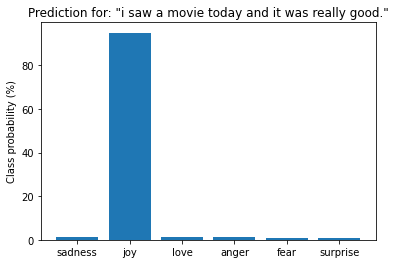

In [84]:
plt.bar(labels, 100 * probs, color='C0')
plt.title(f'Prediction for: "{custom_tweet}"')
plt.ylabel("Class probability (%)");